In [1]:
%matplotlib widget

import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
import pandas as pd
from sample.util import get_dates_datetime, get_dirname, get_plate_number, get_postion_number

import ast
from sample.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
from sample.pipeline.functions.node_id import orient
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from sample.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from sample.pipeline.functions.experiment_class_surf import Experiment
from sample.paths.directory import run_parallel, find_state, directory_scratch, directory_project, path_code
from IPython.display import clear_output



In [2]:
plate = 33
directory = directory_project
dates_datetime = get_dates_datetime(directory,plate)


In [23]:
dates_datetime[begin:end+1]

[datetime.datetime(2020, 10, 3, 22, 12),
 datetime.datetime(2020, 10, 5, 9, 41),
 datetime.datetime(2020, 10, 5, 13, 41),
 datetime.datetime(2020, 10, 5, 17, 41),
 datetime.datetime(2020, 10, 5, 21, 41),
 datetime.datetime(2020, 10, 6, 1, 41),
 datetime.datetime(2020, 10, 6, 5, 41),
 datetime.datetime(2020, 10, 6, 9, 41),
 datetime.datetime(2020, 10, 6, 13, 41),
 datetime.datetime(2020, 10, 6, 17, 41),
 datetime.datetime(2020, 10, 6, 21, 41),
 datetime.datetime(2020, 10, 7, 1, 41),
 datetime.datetime(2020, 10, 7, 5, 41),
 datetime.datetime(2020, 10, 7, 9, 41),
 datetime.datetime(2020, 10, 7, 13, 41),
 datetime.datetime(2020, 10, 7, 17, 41),
 datetime.datetime(2020, 10, 7, 21, 41),
 datetime.datetime(2020, 10, 8, 1, 41),
 datetime.datetime(2020, 10, 8, 5, 41),
 datetime.datetime(2020, 10, 8, 9, 41),
 datetime.datetime(2020, 10, 8, 13, 40)]

In [3]:
begin = 0
end = begin+26
dates_datetime = get_dates_datetime(directory,plate)
dates_datetime_chosen=dates_datetime[begin:end+1]
dates = [f'{0 if date.month<10 else ""}{date.month}{0 if date.day<10 else ""}{date.day}_{0 if date.hour<10 else ""}{date.hour}{0 if date.minute<10 else ""}{date.minute}' for date in dates_datetime_chosen]
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
for date in dates:
    directory_name=f'2020{date}_Plate{0 if plate<10 else ""}{plate}'
    path_snap=directory+directory_name
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)


In [4]:
def get_time(dates_datetimes,i,j):
    seconds = (dates_datetimes[j]-dates_datetimes[i]).total_seconds()
    return(seconds/3600)

In [9]:
start=0
finish = end-begin
for i in range(start,finish):
    plt.close('all')
    clear_output(wait=True)
    plot_t_tp1([], [], None, None, skels[i], ims[i], save=f'/home/cbisot/pycode/MscThesis/sample/notebooks/plotting/Figure/im{i}',time=f't = {int(get_time(dates_datetime_chosen,0,i))}h')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyboardInterrupt: 

In [28]:
start=0
finish = end-begin
img_array = []
for t in range(start,finish):
    img = cv2.imread(f'Figure/im{t}.png')
    img_array.append(img)
imageio.mimsave(f'Figure/movie{plate}temp_ {begin}_{end}_{dates[start]}_{dates[finish]}.gif', img_array,duration = 1)

KeyboardInterrupt: 

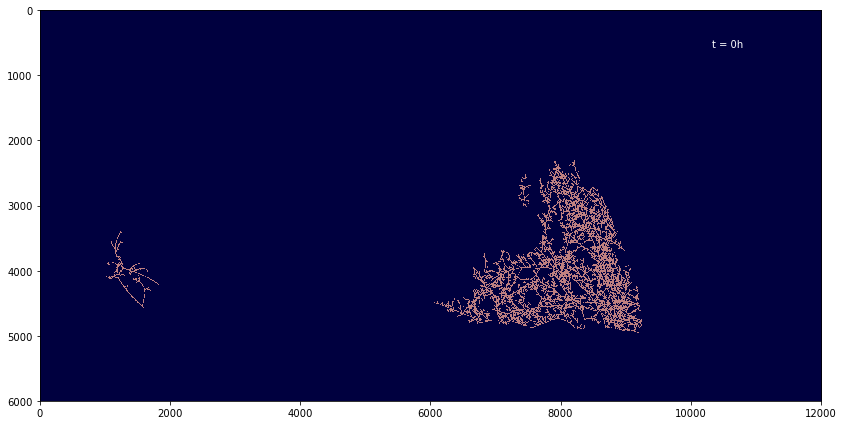

In [11]:
import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
import pandas as pd
from sample.util import get_dates_datetime, get_dirname, get_plate_number, get_postion_number

import ast
from sample.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
from sample.pipeline.functions.node_id import orient
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from sample.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from sample.pipeline.functions.experiment_class_surf import Experiment
from sample.paths.directory import run_parallel, find_state, directory_scratch, directory_project, path_code
from IPython.display import clear_output
from sample.notebooks.analysis.data_info import *

def get_time(dates_datetimes,i,j):
    seconds = (dates_datetimes[j]-dates_datetimes[i]).total_seconds()
    return(seconds/3600)
directory = directory_project

results={}
for treatment in treatments.keys():
    insts = treatments[treatment]
    for inst in insts:
        print(inst)
        plate_label = plate_number[inst] 
        plate,begin,end = inst
        dates_datetime = get_dates_datetime(directory,plate)
        dates_datetime_chosen=dates_datetime[begin:end+1]
        dates = [f'{0 if date.month<10 else ""}{date.month}{0 if date.day<10 else ""}{date.day}_{0 if date.hour<10 else ""}{date.hour}{0 if date.minute<10 else ""}{date.minute}' for date in dates_datetime_chosen]
        skels = []
        ims = []
        kernel = np.ones((5,5),np.uint8)
        itera = 2
        for date in dates:
            directory_name=f'2020{date}_Plate{0 if plate<10 else ""}{plate}'
            path_snap=directory+directory_name
            skel_info = read_mat(path_snap+'/Analysis/skeleton_realigned_compressed.mat')
            skel = skel_info['skeleton']
            skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
            im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
            ims.append(im)
        start=0
        finish = end-begin
        for i in range(start,finish):
            plt.close('all')
            clear_output(wait=True)
            plot_t_tp1([], [], None, None, skels[i], skels[i], save=f'/home/cbisot/pycode/MscThesis/sample/notebooks/plotting/Figure/im*{i}',time=f't = {int(get_time(dates_datetime_chosen,0,i))}h')
        img_array = []
        for t in range(start,finish):
            img = cv2.imread(f'/home/cbisot/pycode/MscThesis/sample/notebooks/plotting/Figure/im*{t}.png')
            img_array.append(img)
        imageio.mimsave(f'/home/cbisot/pycode/MscThesis/sample/notebooks/plotting/Figure/movie*{plate_label}temp_ {begin}_{end}_{dates[start]}_{dates[finish]}.gif', img_array,duration = 1)

In [34]:
exp.plot([59],[])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
def get_im_stitched(exp,boundaries,t,directory):
    i = t
    plate = exp.plate
    listdir=os.listdir(directory) 
    dates = exp.dates
    date =dates [i]
    directory_name = get_dirname(date, plate)
    path_snap=directory+directory_name
    path_tile=path_snap+'/Img/TileConfiguration.txt.registered'
    try:
        tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
    except:
        print('error_name')
        path_tile=path_snap+'/Img/TileConfiguration.registered.txt'
        tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
    skel = read_mat(path_snap+'/Analysis/skeleton_pruned_realigned.mat')
    Rot= skel['R']
    trans = skel['t']
    shape = (3000,4096)
    xs =[c[0] for c in tileconfig[2]]
    ys =[c[1] for c in tileconfig[2]]
    dim = (boundaries[3]-boundaries[2],boundaries[1]-boundaries[0])
    ims = []
    for name in tileconfig[0]:
        imname = '/Img/'+name.split('/')[-1]
#     ims.append(imageio.imread('//sun.amolf.nl/shimizu-data/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE'+date_plate+plate_str+'/Img/'+name))
        ims.append(imageio.imread(directory+directory_name+imname))
    im_stitched = np.zeros(dim,dtype=np.uint8)
    for index,im in enumerate(ims):
        xyangle = np.array([int(tileconfig[2][index][0]-np.min(xs)),int(tileconfig[2][index][1]-np.min(ys))])
    #     xyangle_corrected =  np.transpose(np.transpose(np.dot(Rot,xyangle))+trans)
        xyangle_corrected =  xyangle
        limits = int(xyangle_corrected[0]-boundaries[0]),int(xyangle_corrected[1]-boundaries[2])
        if limits[1]>=-shape[0] and limits[1]<=dim[0] and limits[0]>=-shape[1] and limits[0]<=dim[1]:
            b_im_s = max(0,limits[1]),min(dim[0],limits[1]+shape[0]),max(0,limits[0]),min(dim[1],limits[0]+shape[1])
            shape_crop = b_im_s[1]-b_im_s[0], b_im_s[3]-b_im_s[2]
            b_im0 =-limits[1] if limits[1]<0 else 0
            b_im1 = b_im0+shape_crop[0]
            b_im2 = -limits[0] if limits[0]<0 else 0
            b_im3 = b_im2+shape_crop[1]
            b_im = b_im0,b_im1,b_im2,b_im3
            im_stitched[b_im_s[0]:b_im_s[1],b_im_s[2]:b_im_s[3]] = im[b_im[0]:b_im[1],b_im[2]:b_im[3]]
    return(im_stitched)

In [5]:
def transform_skeleton_final_for_show(skeleton_doc,Rot,trans):
    skeleton_transformed={}
    transformed_keys = np.round(np.transpose(np.dot(Rot,np.transpose(np.array(list(skeleton_doc.keys())))))+trans).astype(np.int)
    i=0
    for pixel in list(transformed_keys):
        i+=1
        skeleton_transformed[(pixel[0],pixel[1])]=1
    skeleton_transformed_sparse=sparse.lil_matrix((27000, 50000))
    for pixel in list(skeleton_transformed.keys()):
        i+=1
        skeleton_transformed_sparse[(pixel[0],pixel[1])]=1
    return(skeleton_transformed_sparse)

In [6]:
def get_skeleton(exp,boundaries,t,directory):
    i = t
    plate = exp.plate   
    listdir=os.listdir(directory) 
    dates = exp.dates
    date =dates [i]
    directory_name = get_dirname(date, plate)
    path_snap=directory+directory_name
    skel = read_mat(path_snap+'/Analysis/skeleton_pruned_realigned.mat')
    skelet = skel['skeleton']
    skelet = sparse_to_doc(skelet)
    Rot= skel['R']
    trans = skel['t']
    skel_aligned = transform_skeleton_final_for_show(skelet,np.linalg.inv(Rot),(-np.dot(np.linalg.inv(Rot),trans)))
    output = skel_aligned[boundaries[2]:boundaries[3],boundaries[0]:boundaries[1]].todense()
    kernel = np.ones((5,5),np.uint8)
    output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 2)
    return(output,Rot,trans)

In [44]:
plt.close('all')
t=8
center = (28500, 18500)
window = (center[0]-2500,center[0]+2500,center[1]-2500,center[1]+2500)
skelet,rot,trans = get_skeleton(exp,window,t,directory)
im_stitched = get_im_stitched(exp,window,t,directory)
nodes = [node.label for node in exp.nodes if t in node.ts() and node.degree(t) ==1 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]

In [45]:
tips = [node.label for node in exp.nodes if t in node.ts() and node.degree(t) ==1 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]

In [46]:
junction =  [node.label for node in exp.nodes if t in node.ts() and node.degree(t) >=2 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]

In [47]:
plt.close('all')
plot_t_tp1(junction,tips,exp.positions[t],exp.positions[t],skelet,im_stitched,shift=(window[2],window[0]),Rot=rot,trans=trans)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
def get_skeleton(exp,boundaries,t,directory):
    i = t
    plate = exp.plate   
    listdir=os.listdir(directory) 
    dates = exp.dates
    date =dates [i]
    directory_name = get_dirname(date, plate)
    path_snap=directory+directory_name
    skel = read_mat(path_snap+'/Analysis/skeleton_pruned_realigned.mat')
    skelet = skel['skeleton']
    skelet = sparse_to_doc(skelet)
    Rot= skel['R']
    trans = skel['t']
    skel_aligned = transform_skeleton_final_for_show(skelet,np.array([[1,0],[0,1]]),np.array([0,0]))
    output = skel_aligned[boundaries[2]:boundaries[3],boundaries[0]:boundaries[1]].todense()
    kernel = np.ones((5,5),np.uint8)
    output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 2)
    return(output,Rot,trans)

In [51]:
plt.close('all')
for t in range(8,60):
    center = (28500, 18500)
    ranges = 1000
    window = (center[0]-ranges,center[0]+ranges,center[1]-ranges,center[1]+ranges)
    skelet,rot,trans = get_skeleton(exp,window,t,directory)
#     im_stitched = get_im_stitched(exp,window,t,directory)
    tips = [node.label for node in exp.nodes if t in node.ts() and node.degree(t) ==1 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    junction =  [node.label for node in exp.nodes if t in node.ts() and node.degree(t) >=2 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    plot_t_tp1(junction,tips,exp.positions[t],exp.positions[t],skelet,skelet,shift=(window[2],window[0]),save=f'Figure/im{t}',time=f't={t}h')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
img_array = []
for t in range(8,60):
    img = cv2.imread(f'Figure/im{t}.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('Figure/plate39.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 2, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [10]:
img_array = []
for t in range(40,60):
    img = cv2.imread(f'Figure/im{t}.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
imageio.mimsave('Figure/plate39.mp4', img_array)

ImportError: To use the imageio ffmpeg plugin you need to 'pip install imageio-ffmpeg'

In [22]:
plt.close('all')
for t in range(40,41):
    center = (26250,11250)
    window = (center[0]-2500,center[0]+2500,center[1]-2500,center[1]+2500)
    skelet = get_skeleton(exp,window,t,directory)
    im_stitched = get_im_stitched(exp,window,t,directory)
    tips = [node.label for node in exp.nodes if t in node.ts() and node.degree(t) ==1 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    junction =  [node.label for node in exp.nodes if t in node.ts() and node.degree(t) >=2 and node.pos(t)[1]>=window[0] and node.pos(t)[1]<=window[1] and node.pos(t)[0]>=window[2] and node.pos(t)[0]<=window[3]]
    plot_t_tp1(junction,tips,exp.positions[t],exp.positions[t],skelet,im_stitched,shift=(window[2],window[0]),save=f'Figure/im{t}',time=f't={4*t}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 8703

In [18]:
im_stitched = get_im_stitched(exp,window,60,directory)

In [19]:
plot_t_tp1([],[],None,None,im_stitched,im_stitched)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:

img_array = []
for t in range(0,15):
    img = cv2.imread(f'Data/im{t}.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('Data/project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [85]:
plt.close('all')
plot_t_tp12(junction,tips,exp.positions[t],exp.positions[t],skelet,im_stitched,shift=(window[2],window[0]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [53]:
def plot_t_tp1(node_list_t,node_list_tp1,pos_t,pos_tp1,imt,imtp1, Rot = np.array([[1,0],[0,1]]),trans = np.array([0,0]),relabel_t=lambda x:x,relabel_tp1=lambda x:x, shift=(0,0),compress=1,save='',time=None):
    right = 0.90
    top = 0.90
    R = np.linalg.inv(Rot)
    tr = -np.dot(np.linalg.inv(Rot),trans)
    if len(save)>=1:
        fig=plt.figure(figsize=(14,12))
        size = 10
    else:
        fig = plt.figure()
        size = 5
    ax = fig.add_subplot(111)
    ax.imshow(imtp1, cmap='gray',interpolation='none')
    ax.imshow(imt, cmap='jet', alpha=0.5,interpolation='none')
    bbox_props1 = dict(boxstyle="circle", fc="grey")
    bbox_props2 = dict(boxstyle="circle", fc="white")

    for node in node_list_t:
        position = np.dot(R,pos_t[node])+tr
        t = ax.text((position[1]-shift[1])//compress, (position[0]-shift[0])//compress, str(relabel_t(node)), ha="center", va="center",
                    size=size,
                    bbox=bbox_props1)
    for node in node_list_tp1:
        if node in pos_tp1.keys():
            position = np.dot(R,pos_tp1[node])+tr
            t = ax.text((position[1]-shift[1])//compress, (position[0]-shift[0])//compress, str(relabel_tp1(node)), ha="center", va="center",
                        size=size,
                        bbox=bbox_props2)
    ax.text(right, top, time,
    horizontalalignment='right',
    verticalalignment='bottom',
    transform=ax.transAxes,color='white',fontsize=30)
    if len(save)>=1:
        plt.savefig(save)
        plt.close(fig)
    else:
        plt.show()

In [36]:
def plot_t_tp12(node_list_t,node_list_tp1,pos_t,pos_tp1,imt,imtp1, Rot = np.array([[1,0],[0,1]]),trans = np.array([0,0]),relabel_t=lambda x:x,relabel_tp1=lambda x:x, shift=(0,0),compress=1,save='',time=None):
    right = 0.90
    top = 0.90
    R = np.linalg.inv(Rot)
    tr = -np.dot(np.linalg.inv(Rot),trans)
    if len(save)>=1:
        fig=plt.figure(figsize=(14,12))
        size = 10
    else:
        fig = plt.figure()
        size = 5
    ax = fig.add_subplot(111)
    ax.imshow(imtp1, cmap='gray',interpolation='none')
    ax.imshow(imt, cmap='jet', alpha=0.5,interpolation='none')
    bbox_props1 = dict(boxstyle="circle", fc="grey")
    bbox_props2 = dict(boxstyle="circle", fc="white")
    ax.text(right, top, time,
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes,color='white')
    for node in node_list_t:
        position = np.dot(R,pos_t[node])+tr
        plt.scatter((position[1]-shift[1])//compress, (position[0]-shift[0])//compress,s=2,c='black')
    for node in node_list_tp1:
        if node in pos_tp1.keys():
            position = np.dot(R,pos_tp1[node])+tr
            plt.scatter((position[1]-shift[1])//compress, (position[0]-shift[0])//compress,s=2,c='green')
    if len(save)>=1:
        plt.savefig(save)
        plt.close(fig)
    else:
        plt.show()

In [51]:
plot_t_tp1([],[],None,None,skelet,im_stitched)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.imshow(im_stitched,cmap='gray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
hyph_chose = [hyph for hyph in exp.hyphaes if hyph.end.label == 7016]

In [29]:
hyph = hyph_chose[0]
hyph.ts

[14, 15, 16, 17, 18, 19]

In [31]:
hyph.end.ts()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [17]:
hyph = choice(exp.hyphaes)
hyph.ts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [30]:
plt.close('all')
exp.plot([hyph.ts[0],hyph.ts[-1]],[[hyph.root.label,hyph.end.label]]*2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
plt.close('all')
hyph.end.show_source_image(hyph.ts[-1],hyph.ts[-1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [57]:
t=9

In [58]:
hyph.root.pos(t)

array([14396, 19883])

In [14]:
boundaries = (10000,20000,7000,15000)
t = 10
i = t
plate = exp.plate
directory = "/scratch/shared/mrozemul/Fiji.app/" 
listdir=os.listdir(directory) 
dates = exp.dates
date =dates [i]
directory_name=f'2020{date}_Plate{0 if plate<10 else ""}{plate}'
path_snap='/scratch/shared/mrozemul/Fiji.app/'+directory_name
path_tile=path_snap+'/Img/TileConfiguration.txt.registered'
try:
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
except:
    print('error_name')
    path_tile=path_snap+'/Img/TileConfiguration.registered.txt'
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
skel = read_mat(path_snap+'/Analysis/skeleton_realigned.mat')
Rot= skel['R']
trans = skel['t']
shape = (3000,4096)
xs =[c[0] for c in tileconfig[2]]
ys =[c[1] for c in tileconfig[2]]
dim = (boundaries[1]-boundaries[0],boundaries[3]-boundaries[2])
ims = []
for name in tileconfig[0]:
#     ims.append(imageio.imread('//sun.amolf.nl/shimizu-data/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE'+date_plate+plate_str+'/Img/'+name))
    ims.append(imageio.imread(f'{name}'))
im_stitched = np.zeros(dim,dtype=np.uint8)
for index,im in enumerate(ims):
    xyangle = np.array([int(tileconfig[2][index][0]-np.min(xs)),int(tileconfig[2][index][1]-np.min(ys))])
#     xyangle_corrected =  np.transpose(np.transpose(np.dot(Rot,xyangle))+trans)
    xyangle_corrected =  xyangle
    limits = int(xyangle_corrected[0]-boundaries[0]),int(xyangle_corrected[1]-boundaries[2])
    if limits[1]>=-shape[0] and limits[1]<=dim[0] and limits[0]>=-shape[1] and limits[0]<=dim[1]:
        b_im_s = max(0,limits[1]),min(dim[0],limits[1]+shape[0]),max(0,limits[0]),min(dim[1],limits[0]+shape[1])
        shape_crop = b_im_s[1]-b_im_s[0], b_im_s[3]-b_im_s[2]
        b_im0 =-limits[1] if limits[1]<0 else 0
        b_im1 = b_im0+shape_crop[0]
        b_im2 = -limits[0] if limits[0]<0 else 0
        b_im3 = b_im2+shape_crop[1]
        b_im = b_im0,b_im1,b_im2,b_im3
        im_stitched[b_im_s[0]:b_im_s[1],b_im_s[2]:b_im_s[3]] = im[b_im[0]:b_im[1],b_im[2]:b_im[3]]
plt.close('all')
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
ax.imshow(im_stitched)

(0, 470, 0, 921)
(0, 538, 0, 4033)
(0, 611, 3159, 7255)
(0, 686, 6370, 8000)
(0, 2882, 0, 742)
(0, 2951, 0, 3981)
(22, 3022, 3106, 7202)
(94, 3094, 6317, 8000)
(2303, 5303, 0, 685)
(2371, 5371, 0, 3926)
(2443, 5443, 3051, 7147)
(2517, 5517, 6262, 8000)
(4711, 7711, 0, 629)
(4783, 7783, 0, 3866)
(4853, 7853, 2990, 7086)
(4925, 7925, 6200, 8000)
(7121, 10000, 0, 577)
(7194, 10000, 0, 3812)
(7264, 10000, 2935, 7031)
(7334, 10000, 6144, 8000)
(9526, 10000, 0, 519)
(9596, 10000, 0, 3753)
(9665, 10000, 2873, 6969)
(9739, 10000, 6083, 8000)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
boundaries = (13000,20000,18000,28000)
t = 10
i = t
plate = exp.plate
directory = "/scratch/shared/mrozemul/Fiji.app/" 
listdir=os.listdir(directory) 
dates = exp.dates
date =dates [i]
directory_name=f'2020{date}_Plate{0 if plate<10 else ""}{plate}'
path_snap='/scratch/shared/mrozemul/Fiji.app/'+directory_name
path_tile=path_snap+'/Img/TileConfiguration.txt.registered'
try:
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
except:
    print('error_name')
    path_tile=path_snap+'/Img/TileConfiguration.registered.txt'
    tileconfig = pd.read_table(path_tile,sep=';',skiprows=4,header=None,converters={2 : ast.literal_eval},skipinitialspace=True)
skel = read_mat(path_snap+'/Analysis/skeleton_realigned.mat')
Rot= skel['R']
trans = skel['t']
shape = (3000,4096)
xs =[c[0] for c in tileconfig[2]]
ys =[c[1] for c in tileconfig[2]]
dim = (boundaries[1]-boundaries[0],boundaries[3]-boundaries[2])
ims = []
for name in tileconfig[0]:
#     ims.append(imageio.imread('//sun.amolf.nl/shimizu-data/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE'+date_plate+plate_str+'/Img/'+name))
    ims.append(imageio.imread(f'{name}'))
im_stitched = np.zeros(dim,dtype=np.uint8)



(0, 2008, 0, 693)
(0, 2082, 0, 3909)
(0, 2152, 3020, 7000)
(0, 2221, 6244, 7000)


In [26]:
im.shape

(3000, 4096)

In [46]:
b_im

(2008, 5008, 693, 4789)

In [23]:
dim

(7000, 10000)

In [7]:
max(0,limits[0]),limits[0]+shape[1],limits[0]

(3020, 7116, 3020)

In [9]:
im[-min(0,limits[1]):,-min(0,limits[0]):].shape

(2152, 4096)

In [11]:
max(0,limits[0]),limits[0]+shape[1]

(3020, 7116)